Tutorial for generating CFXs with PyCFX, using a Random Forest (SKLearn) model.

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from pycfx.datasets import *
from pycfx.models import *
from pycfx.benchmarker import *
from pycfx.helpers.visualisation import *
from pycfx.conformal import *
from pycfx.counterfactual_explanations import *

In [ ]:
#Set up dataset

Dataset = SyntheticBimodal
dataset_kwargs = {"size": 4}
factual = np.array([0, 4])
y_target = 1 

<Axes: >

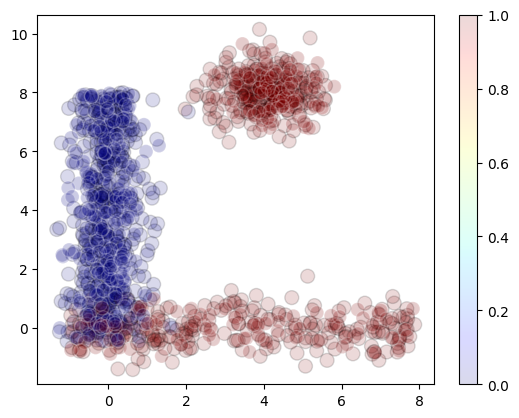

In [ ]:
#Visualise dataset

dataset = Dataset(0.6, 0.2, 0.2, **dataset_kwargs)
X_train, y_train, X_calib, y_calib, X_test, y_test = dataset.get_X_y_split()
plot_split_dataset(X_train, X_test, y_train, y_test)

In [ ]:
#Train and save the model, or load the model.

model = RandomForestSKLearn(config={}, input_properties=dataset.input_properties)
model.load_or_train(Path("rf_bimodal_data"), X_train, y_train, True)

,n_estimators,5
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<Axes: >

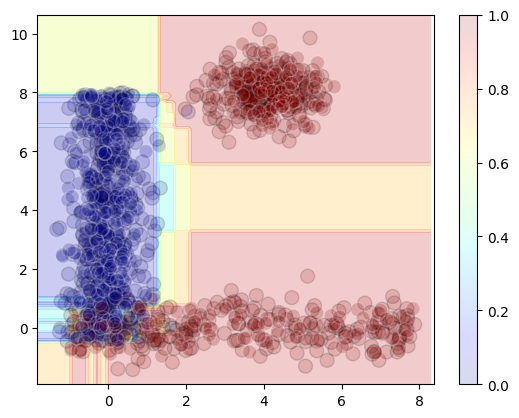

In [ ]:
#Plot the decision boundary

plot_decision_boundary(model, X_train, X_test, y_train, y_test)

In [ ]:
#Evaluate the model

model.evaluate(X_test, y_test)

{'accuracy': 94.0625,
 'precision': 94.0611960714848,
 'f1_score': 94.0609232229446}

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2688232
Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 24 rows, 262 columns and 504 nonzeros
Model fingerprint: 0x1e57106e
Model has 1034 general constraints
Variable types: 28 continuous, 234 integer (234 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-02, 4e+00]
  GenCon rhs range [3e-03, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 992 rows and 981 columns
Presolve time: 0.02s
Presolved: 1016 rows, 1243 columns, 4593

<Axes: >

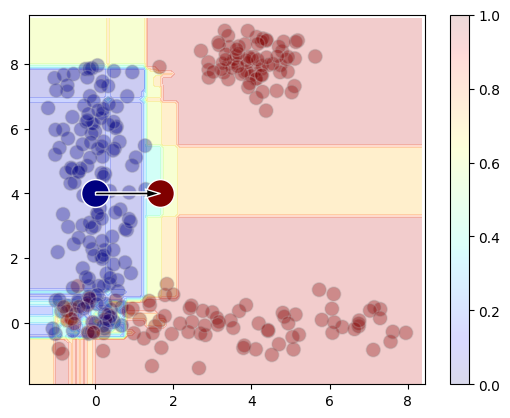

In [ ]:
#Obtain Min Distance CFX

mindist_gen = MinDistanceCF(model, dataset.input_properties, config={"db_distance":0.05})
mindist_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = mindist_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

<Axes: >

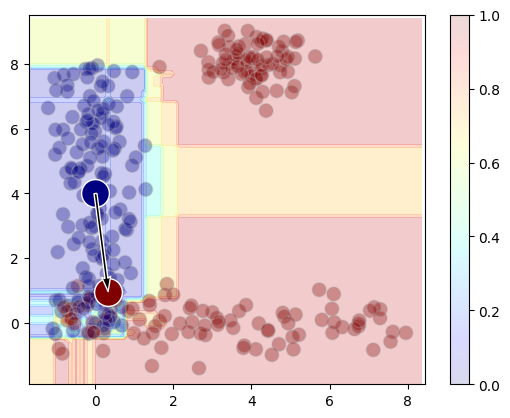

In [ ]:
#Obtain Nearest Neighbour CFX

nn_gen = NearestNeighbourCF(model, dataset.input_properties, config={})
nn_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = nn_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

<Axes: >

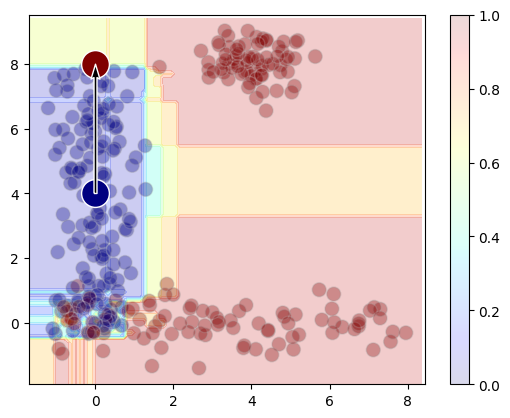

In [ ]:
# Obtain FeatureTweak CFX

ft_gen = FeatureTweakGenerator(model, dataset.input_properties, config={})
ft_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = ft_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

The number of rows that are unchanged ever is 0
The mean distance is 3.028020466047089


<Axes: >

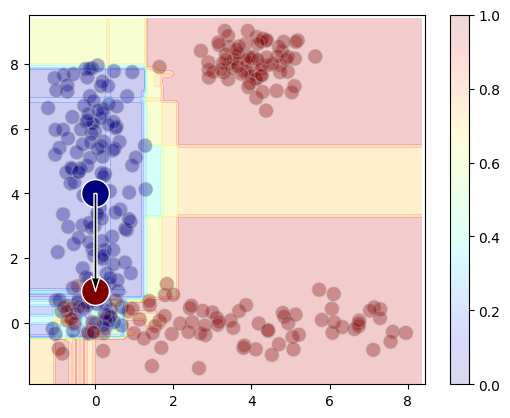

In [ ]:
# Obtain FOCUS CFX
focus_gen = FOCUSGenerator(model, dataset.input_properties, config={})
focus_gen.setup(X_train, y_train, X_calib, y_calib)
counterfactual = focus_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 37 rows, 297 columns and 598 nonzeros
Model fingerprint: 0x3d5d21f1
Model has 3 quadratic constraints
Model has 1112 general constraints
Variable types: 43 continuous, 254 integer (254 binary)
Coefficient statistics:
  Matrix range     [6e-02, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-06, 4e+00]
  GenCon rhs range [3e-03, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 182 rows and 46 columns
Presolve time: 0.03s
Presolved: 219 rows, 343 columns, 1843 nonzeros
Presolved model has 165 SOS constraint(s)
Variable types: 171 continuous, 172 integer (171 binary)
Found 

<Axes: >

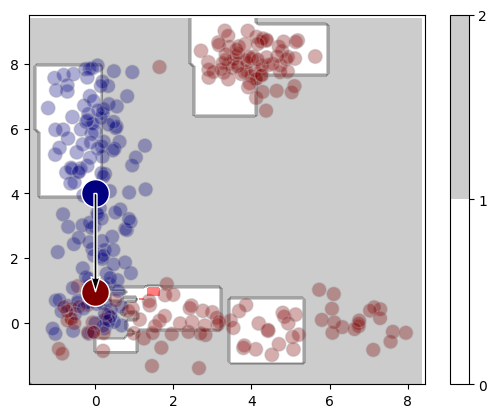

In [ ]:
#Obtain ConfexTREE CFX

ccf2 = {"alpha": 0.03,
        "scorefn_name":'linear_normalised',
        "kernel_bandwidth": 0.4,
        "inf_quantile": True,
        }
conformalCF_c = ConformalCF(model, dataset.input_properties, config={"conformal_class": ConformalCONFEXTree, "conformal_config": ccf2})
conformalCF_c.setup(X_train, y_train, X_calib, y_calib)
counterfactual_conformal_c = conformalCF_c.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual_conformal_c, model, X_calib, X_calib, y_calib, y_calib, conformal=conformalCF_c.conformal)